In [1]:
#import sys
#sys.path.append('/Users/joanna/research/nflows')

import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
import torch.optim as optim

from nflows.flows import MaskedAutoregressiveFlow

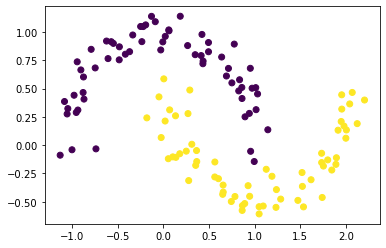

In [2]:
x, y = datasets.make_moons(128, noise=.1)
plt.scatter(x[:, 0], x[:, 1], c=y);

In [3]:
flow = MaskedAutoregressiveFlow(features=2, hidden_features=4, context_features=1)
optimizer = optim.Adam(flow.parameters())

In [ ]:
num_iter = 5000
for i in range(num_iter):
    x, y = datasets.make_moons(128, noise=.1)
    x = torch.tensor(x, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x, context=y).mean()
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 500 == 0:
        import pdb; pdb.set_trace()
        fig, ax = plt.subplots(1, 2)
        xline = torch.linspace(-1.5, 2.5)
        yline = torch.linspace(-.75, 1.25)
        xgrid, ygrid = torch.meshgrid(xline, yline)
        xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        with torch.no_grad():
            zgrid0 = flow.log_prob(xyinput, torch.zeros(10000, 1)).exp().reshape(100, 100)
            zgrid1 = flow.log_prob(xyinput, torch.ones(10000, 1)).exp().reshape(100, 100)

        ax[0].contourf(xgrid.numpy(), ygrid.numpy(), zgrid0.numpy())
        ax[1].contourf(xgrid.numpy(), ygrid.numpy(), zgrid1.numpy())
        plt.title('iteration {}'.format(i + 1))
        plt.show()

> /var/folders/_k/xbbdqcr54b3bqjfpdw47pfs80000gn/T/ipykernel_27968/2105246542.py(13)<module>()
     11     if (i + 1) % 500 == 0:
     12         import pdb; pdb.set_trace()
---> 13         fig, ax = plt.subplots(1, 2)
     14         xline = torch.linspace(-1.5, 2.5)
     15         yline = torch.linspace(-.75, 1.25)

ipdb> n
> /var/folders/_k/xbbdqcr54b3bqjfpdw47pfs80000gn/T/ipykernel_27968/2105246542.py(14)<module>()
     12         import pdb; pdb.set_trace()
     13         fig, ax = plt.subplots(1, 2)
---> 14         xline = torch.linspace(-1.5, 2.5)
     15         yline = torch.linspace(-.75, 1.25)
     16         xgrid, ygrid = torch.meshgrid(xline, yline)

ipdb> n
> /var/folders/_k/xbbdqcr54b3bqjfpdw47pfs80000gn/T/ipykernel_27968/2105246542.py(15)<module>()
     13         fig, ax = plt.subplots(1, 2)
     14         xline = torch.linspace(-1.5, 2.5)
---> 15         yline = torch.linspace(-.75, 1.25)
     16         xgrid, ygrid = torch.meshgrid(xline, yline)
     17         

ipdb> xyinput
tensor([[-1.5000, -0.7500],
        [-1.5000, -0.7298],
        [-1.5000, -0.7096],
        ...,
        [ 2.5000,  1.2096],
        [ 2.5000,  1.2298],
        [ 2.5000,  1.2500]])
ipdb> n
> /var/folders/_k/xbbdqcr54b3bqjfpdw47pfs80000gn/T/ipykernel_27968/2105246542.py(20)<module>()
     18 
     19         with torch.no_grad():
---> 20             zgrid0 = flow.log_prob(xyinput, torch.zeros(10000, 1)).exp().reshape(100, 100)
     21             zgrid1 = flow.log_prob(xyinput, torch.ones(10000, 1)).exp().reshape(100, 100)
     22 

ipdb> dir(flow)
['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply